# Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
!wget https://raw.githubusercontent.com/datasets/sea-level-rise/refs/heads/main/data/epa-sea-level.csv

--2025-01-18 05:36:22--  https://raw.githubusercontent.com/datasets/sea-level-rise/refs/heads/main/data/epa-sea-level.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6249 (6.1K) [text/plain]
Saving to: ‘epa-sea-level.csv’

epa-sea-level.csv   100%[===================>]   6.10K  --.-KB/s    in 0s      

2025-01-18 05:36:22 (54.8 MB/s) - ‘epa-sea-level.csv’ saved [6249/6249]



sea_level_plot.png


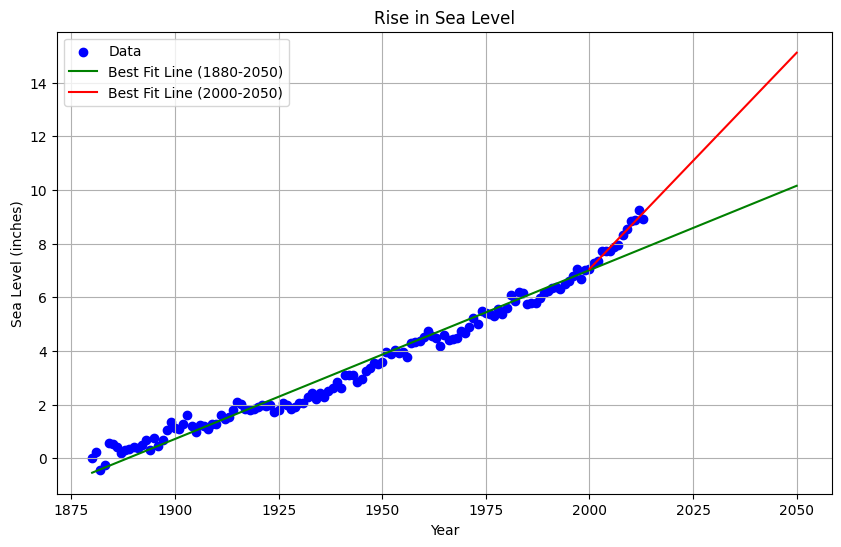

In [4]:
def draw_plot():
    # Read data from file
    data = pd.read_csv('epa-sea-level.csv')

    # Remove rows with NaN values in 'CSIRO Adjusted Sea Level'
    data = data.dropna(subset=['CSIRO Adjusted Sea Level'])

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Year'], data['CSIRO Adjusted Sea Level'], label='Data', color='blue')

    # Create first line of best fit (using all data)
    slope, intercept, _, _, _ = linregress(data['Year'], data['CSIRO Adjusted Sea Level'])
    years_extended = pd.Series(range(1880, 2051))
    sea_level_predicted = intercept + slope * years_extended
    plt.plot(years_extended, sea_level_predicted, label='Best Fit Line (1880-2050)', color='green')

    # Create second line of best fit (using data from 2000)
    recent_data = data[data['Year'] >= 2000]
    slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])
    years_recent = pd.Series(range(2000, 2051))
    sea_level_recent_predicted = intercept_recent + slope_recent * years_recent
    plt.plot(years_recent, sea_level_recent_predicted, label='Best Fit Line (2000-2050)', color='red')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.grid(True)

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot_fig = draw_plot()
print('sea_level_plot.png')